# Libraries

In [31]:
!pip install scikit-learn

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time



import statsmodels as sm 
import scipy as sc 

import datasets

from sklearn import datasets 


In [ ]:

np.random.seed(143)

# Central Tendency

""" 
1. Mean - Arithmetic Mean
* Average of all the values in a given list of elements
* Outliers Has impact on this metric
* Skewed Distributions also has impact on this metric
* Mean can be used directly if the data is normally distributed


2. Mode
* It tells the most frequently occured element in the given array / list
* If there are two elements of same frequency ( high occurences ) then both values will be shown and its called bi-modal
* If more numbers are there then it is multi-modal
* This is commonly used in categorical data replacement
*

3. Median
* This is helpful in place of Mean, where the data is non normally distributed 
* Median is not affected by the outliers that heavily as it is on the Mean
* The skewed dataset also has little effect on the Median
* Median is used when the dataset is of above distribution


"""

In [33]:
data = datasets.fetch_california_housing()
df, df_tr = pd.DataFrame(data['data'], columns=data['feature_names']), pd.DataFrame(data['target'], columns=data['target_names'])
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [34]:
random_list = np.random.randint(5,50,size=10)#(1,10,)
random_list

array([19, 30, 22, 38, 39, 47, 23, 12, 34, 31])

In [35]:
standard_list = [5,6,7,8,9,9]

avg = np.mean(standard_list)
medin = np.median(standard_list)
modes = sc.stats.mode(standard_list)
avg, medin, modes[0]

(7.333333333333333, 7.5, 9)

In [36]:
## mode
max(set(standard_list), key=standard_list.count)

9

# Dispersion

 
1. Variance
* This tells how the data is spread, not in the same units as the data is
* It is the sum of squared difference between the mean and individual values
* Variance value is used as an intermediate step in some of the statistics like chi-square test
* This is not generally preferred


2. Standard Deviation
* SD basically tells how condensed or scattered the data is around the mean, lower the SD number - closer the values to Mean
* SD is the square root of Variance
* SD is in the same units of the data is.
* Easy to interpret
* For a normally distributed dataset, any data point will fall < 3 SD
* Ex: mean 80 and SD: 7.07 then for a given datapoint x1=90, its SD is (80-90)/7.07 = 1.4 SD <= 3 SD
* This is also used to detect outliers


3. Range
* Maximum - Minimum

4. Percentile
* Eg: 10th percentile; then sorted list of elements, check for the value which tells it has the 10% values less than this number \
  and rest of 90% value > than this number
* similarly there can be many such percentailes 10, 20, 55, 75,...


5. IQR
* 75th - 25th quartile difference, tells the dispersion of middle 50% of the data
 

In [37]:
random_gen_values = (np.random.uniform(low=0, high=1, size=10000)).tolist()


# Box plots
It tells medain at the center line, lower thick and upper thick line tells 25th and 75th percentile \
And the extreme bars tells the range : maximum and minimum values ; the circles outisde tells the outliers

<Axes: ylabel='AveBedrms'>

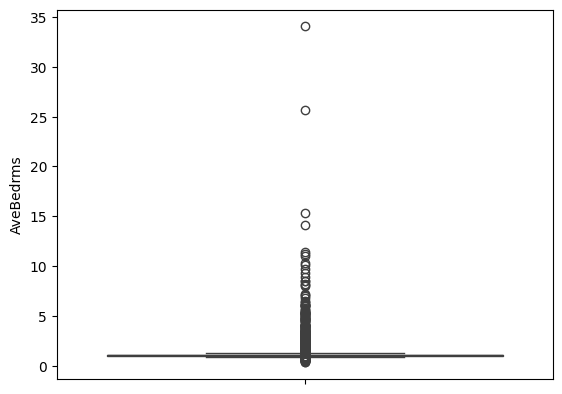

In [38]:
sns.boxplot(df['AveBedrms'])

<Axes: >

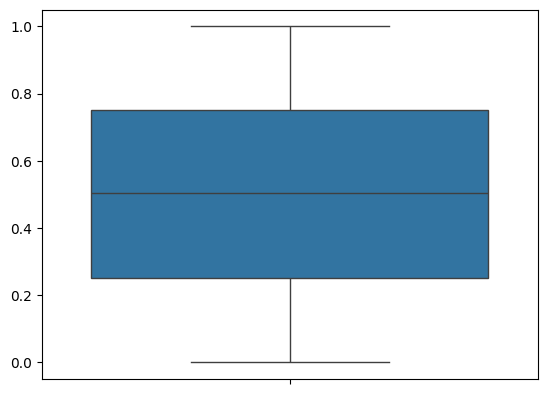

In [39]:
sns.boxplot(random_gen_values)

# Histograms
Basically Bar plots with counts on Y axis for corresponding value on X axis\
\
It rely on binning, and the choice of bin wideth can significantly impact the visual representation of the data \
Wider bins can obscure details, while very narrow bins can create a spiky appearance.

<Axes: ylabel='Count'>

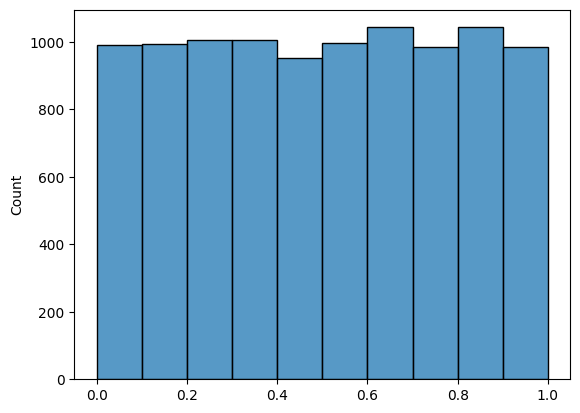

In [40]:
sns.histplot(random_gen_values, kde=False, bins=10)

# Density Plots
It shows the distribution of data values as a continous line. \
A density plot can be thought of as a smoothed histogram, although it is typically computed directly from the data\
through a kernel desnity estimate\
\
A key distiniction from histogram is the scale of the y-axis a density plot corresponds to plotting the histogram as a proportion \
rather than counts \
\
KDEs offer a smoother and more continous representaiton of data distri compared to histograms \
They daddress the binning issue by using a kernel function to estimate the probability density at each data point.\
This provides a more accurate picture of the underlying distribution , especially for non-uniform data. \
While KDEs are generally smoother, they can be sensitive to the choice of the kernel function and its bandwidth

<Axes: ylabel='Density'>

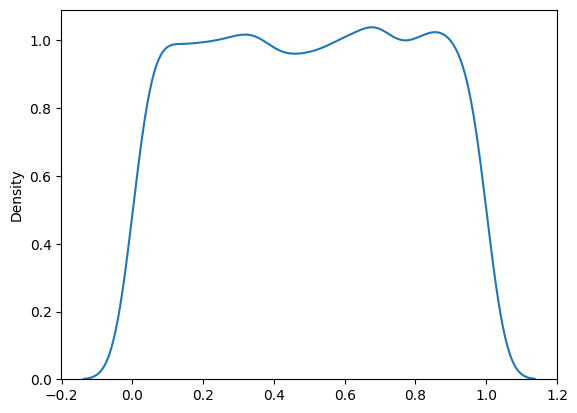

In [41]:
sns.kdeplot(random_gen_values)

# Expected Value
The expected value is calculated as follows : 
1. Multiply each outcome by its probabiltiy of occurrence 
2. Sum these values

EV is really a form of weighted mean: it adds the ideas of future expectations and probability weights, \
often based on subjective judgment.

In [42]:
## house age and the avg number of rooms tells us a value

expected_val = df['HouseAge'] * df['AveRooms']
expected_val = expected_val.sum() / len(expected_val)
expected_val

150.71111325834175

# Correlation
Tells how strongly two variables are related either in Positive or Negative direction \
The correlation coefficient always lies between -1 and +1 ; 0 indicates no correlation \
Variables can have an association that is not linear, in wich case the correlation coefficient may not be useful metric

<Axes: >

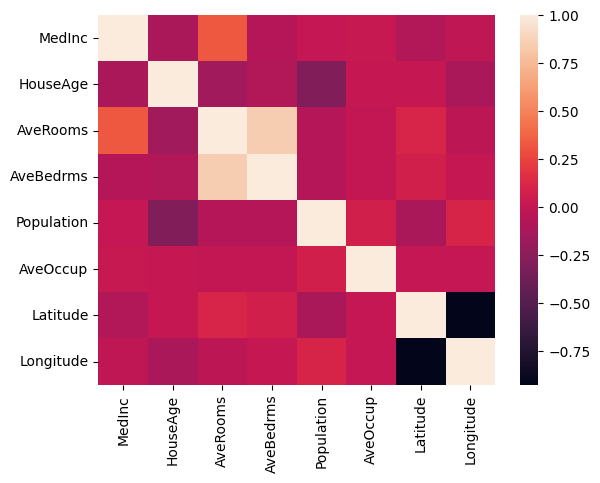

In [43]:
sns.heatmap(df.corr())

# Random sampling and sample bias
A sample is a subset of data from a larger data set; statisticians call this larger data set the population \
Sampling can be done with replacement, in which observations are put back in the population after each draw for possible future reselection \
Or it can be done withouth replacement, in which case observations, once selected, are unavailable for future draws.

## Data quality in Data science involves completeness, consistency of format, cleanliness, accuracy of individual data points
1. RAndom Sampling
2. Stratified sampling
3. Bias - systematic error

## Bias 
An important distinction should be made between errors due to random chance and errors due to bias.



1. SAmple mean vs Population Mean
* Information about samples is observed, and information about large populations is often inferred from smaller samples.

# If You torture the data long enought, sooner or later it will confess

# Central Limit Theorem
* The tendency of the sampling distribution to take on a normal shape as sample size rises

It is importatnt to distinguish between the distribution of the individual data points, known as the data distribution,\
and the distribution of a sample statistic, known as the sampling distribution

In [44]:
sample_data = pd.DataFrame({'income':df['MedInc'].sample(1000),
                            'type':'Data'}) 
sample_data_mean_05 = pd.DataFrame({
    'income':[df['MedInc'].sample(5).mean() for _ in range(1000)],
    'type':'Mean of 5'
})
sample_data_mean_20 = pd.DataFrame({
    'income':[df['MedInc'].sample(20).mean() for _ in range(1000)],
    'type':'Mean of 20'
})


results = pd.concat([sample_data,sample_data_mean_05,sample_data_mean_20])
results

,income,type
15666,3.902800,Data
12854,1.759600,Data
825,4.068200,Data
19316,4.511000,Data
19320,1.371200,Data
...,...,...
995,3.553825,Mean of 20
996,3.633000,Mean of 20
997,3.362645,Mean of 20
998,3.182490,Mean of 20


* Central Limit theorem says that the means drawn from multiple samples will resemble \
the familiar bell shaped normal curve, even if the source population is not normally distributed, provided that the sample size is \
alrge enough and the departure of the data from normality is not too great.

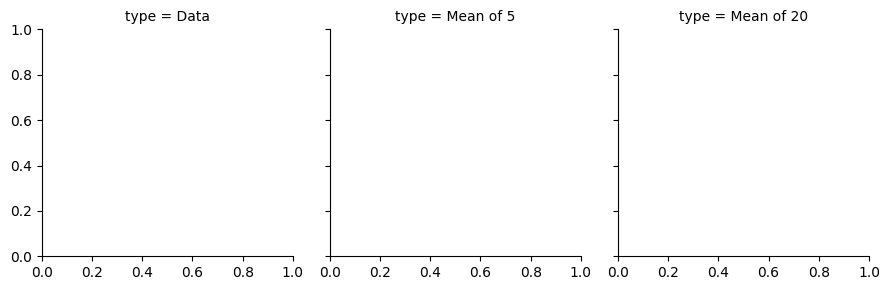

In [45]:
g = sns.FacetGrid(results, col='type')#, col_wrap=1, height=2, aspect=2)
g.map(sns.histplot,)

## standard error :
is a single metric that sums up the variability in the sampling distribution for a statistic;\
SE = standard deviation / sqrt(sample size n)

In [46]:
sdev = np.sqrt(np.var(sample_data_mean_05['income']))
sdev = sdev / np.sqrt(5)
sdev 

0.3680405087201979

In [47]:
sdev = np.sqrt(np.var(sample_data_mean_20['income']))
sdev = sdev / np.sqrt(20)
sdev 

0.09443566090676918